<a href="https://colab.research.google.com/github/HedersonSantos/RegDatChallg/blob/main/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd
import numpy as np
from google.colab import files, drive
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [65]:
#obtendo os arquivos de dados
!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/train.csv
!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/test.csv

--2022-03-26 18:50:09--  https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1397869 (1.3M) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]   1.33M  --.-KB/s    in 0.06s   

2022-03-26 18:50:10 (20.8 MB/s) - ‘train.csv.1’ saved [1397869/1397869]

--2022-03-26 18:50:10--  https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 573899 (560K) [text

In [66]:
dfTrain = pd.read_csv('train.csv')
#dfTest = pd.read_csv('test.csv')
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      4141 non-null   int64  
 1   score   4141 non-null   float64
 2   V3      4141 non-null   float64
 3   V4      4141 non-null   float64
 4   V5      4141 non-null   float64
 5   V6      4141 non-null   float64
 6   V7      4141 non-null   float64
 7   V8      4141 non-null   float64
 8   V9      4141 non-null   float64
 9   V10     4141 non-null   float64
 10  V11     4141 non-null   float64
 11  V12     4141 non-null   float64
 12  V13     4141 non-null   float64
 13  V14     4141 non-null   float64
 14  V15     4141 non-null   float64
 15  V16     4141 non-null   float64
 16  V17     4141 non-null   float64
 17  V18     4141 non-null   float64
 18  V19     4141 non-null   float64
 19  V20     4141 non-null   float64
 20  V21     4141 non-null   float64
 21  V22     4141 non-null   float64
 22  

In [67]:
preditoras = ['V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29']
X = dfTrain[preditoras].values
y = dfTrain['score'].values
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 123)

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
# feature selection
def select_features(X_treino, y_treino, X_teste):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from treinoing data
	fs.fit(X_treino, y_treino)
	# transform treino input data
	X_treino_fs = fs.transform(X_treino)
	# transform teste input data
	X_teste_fs = fs.transform(X_teste)
	return X_treino_fs, X_teste_fs, fs


Feature 0: 0.065710
Feature 1: 0.099992
Feature 2: 0.068212
Feature 3: 0.057044
Feature 4: 0.068360
Feature 5: 0.112910
Feature 6: 0.090879
Feature 7: 0.096064
Feature 8: 0.109232
Feature 9: 0.112934
Feature 10: 0.096238
Feature 11: 0.079665
Feature 12: 0.108782
Feature 13: 0.093947
Feature 14: 0.213526
Feature 15: 0.086393
Feature 16: 0.000000
Feature 17: 0.000000
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.016810
Feature 21: 0.002378
Feature 22: 0.000000
Feature 23: 0.013999
Feature 24: 0.000850
Feature 25: 0.015938
Feature 26: 0.000000


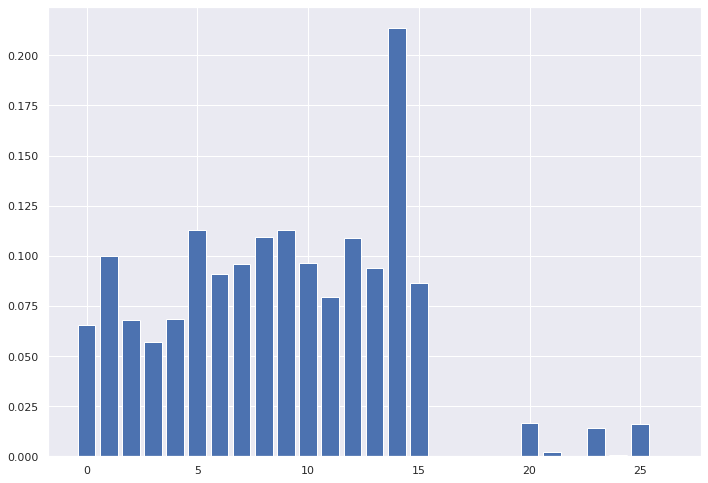

In [69]:
# feature selection
X_treino_fs, X_teste_fs, fs = select_features(X_treino, y_treino, X_teste)

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


In [81]:
#np.argmax(fs.scores_)
importantes = np.argpartition(fs.scores_, -4)[-15:]
n_preditoras = [preditoras[i]  for i in importantes if preditoras[i] not in ['V8','V13','V10','V9']]
#X = dfTrain[n_preditoras].values



3

In [146]:
def imprimeBoxPlot(dfTrain, n_preditoras:list, title=None):
  if title==None: title='Box Plot'
  fig, ax =plt.subplots(np.int64(np.ceil(len(n_preditoras)/3)),3, figsize=(12, 8))#, sharex=True
  j=0
  for i, c in enumerate(n_preditoras):
    j=j if (i%3!=0) | (i==0) else j+1
    k=i%3
    data = dfTrain[[c]]
    sns.boxplot(data=data, orient='h', ax=ax[j,k]).set_title(c + " - " + title)

def imprimeScatter(dados, n_preditoras, title=None):
  if title==None: title=' '
  fig, ax =plt.subplots(np.int64(np.ceil(len(n_preditoras)/3)),3, figsize=(20, 8))#, sharex=True
  j=0
  for i, c in enumerate(n_preditoras):
    j=j if (i%3!=0) | (i==0) else j+1
    k=i%3
    sns.scatterplot(data=dados, x='score', y=c, ax=ax[j,k]).set_title(c + " - " + title)


In [131]:
#filtrando outliers
dados = dfTrain.copy()
for c in n_preditoras:
  # selecionando segundo o total
  Q1 = dados[c].quantile(0.25)
  Q3 = dados[c].quantile(0.75)
  IQR = Q3 - Q1
  dados = dados[(dados[c] >= Q1 - (IQR*1.5)) & (dados[c] <= Q3 + (IQR*1.5))]
  

In [132]:
#correlação
display(dados[n_preditoras].corr('pearson'))
display(dados[n_preditoras].corr('spearman'))

,V16,V18,V5,V14,V7,V4,V15,V12,V17
V16,1.000000,0.418497,0.279782,0.458492,0.279731,0.532060,-0.547359,0.366864,0.136864
V18,0.418497,1.000000,0.642715,0.569879,0.642751,0.701455,-0.639544,0.522765,0.396508
V5,0.279782,0.642715,1.000000,0.602660,0.999995,0.711581,-0.587826,0.422314,0.401633
V14,0.458492,0.569879,0.602660,1.000000,0.602635,0.590169,-0.627408,0.458107,0.049972
V7,0.279731,0.642751,0.999995,0.602635,1.000000,0.711596,-0.587812,0.422272,0.401709
V4,0.532060,0.701455,0.711581,0.590169,0.711596,1.000000,-0.635022,0.473640,0.481123
V15,-0.547359,-0.639544,-0.587826,-0.627408,-0.587812,-0.635022,1.000000,-0.681525,-0.335107
V12,0.366864,0.522765,0.422314,0.458107,0.422272,0.473640,-0.681525,1.000000,0.257421
V17,0.136864,0.396508,0.401633,0.049972,0.401709,0.481123,-0.335107,0.257421,1.000000


,V16,V18,V5,V14,V7,V4,V15,V12,V17
V16,1.000000,0.415693,0.277646,0.475581,0.277579,0.539856,-0.544747,0.387430,0.139626
V18,0.415693,1.000000,0.674067,0.613600,0.674085,0.710359,-0.656818,0.561519,0.384435
V5,0.277646,0.674067,1.000000,0.645146,0.999993,0.728755,-0.628915,0.480951,0.410539
V14,0.475581,0.613600,0.645146,1.000000,0.645094,0.642297,-0.653745,0.492784,0.072825
V7,0.277579,0.674085,0.999993,0.645094,1.000000,0.728737,-0.628874,0.480955,0.410587
V4,0.539856,0.710359,0.728755,0.642297,0.728737,1.000000,-0.668517,0.531727,0.491656
V15,-0.544747,-0.656818,-0.628915,-0.653745,-0.628874,-0.668517,1.000000,-0.717055,-0.331359
V12,0.387430,0.561519,0.480951,0.492784,0.480955,0.531727,-0.717055,1.000000,0.271312
V17,0.139626,0.384435,0.410539,0.072825,0.410587,0.491656,-0.331359,0.271312,1.000000


In [111]:
dados_corr = dados[n_preditoras].corr('pearson')
retirar=[]
analisada = []
for c in dados_corr.columns:
  res = dados_corr[dados_corr[c]>=0.9]
  sai=[]
  for i in res.index.to_list():
    if i in retirar: break
    if i!=c: sai.append(c)
  if len(sai)>0:
    retirar.append(c)

In [115]:
n_preditoras = [c for c in n_preditoras if not c in retirar]

In [116]:
n_preditoras

['V16', 'V18', 'V5', 'V14', 'V7', 'V4', 'V15', 'V12', 'V17']

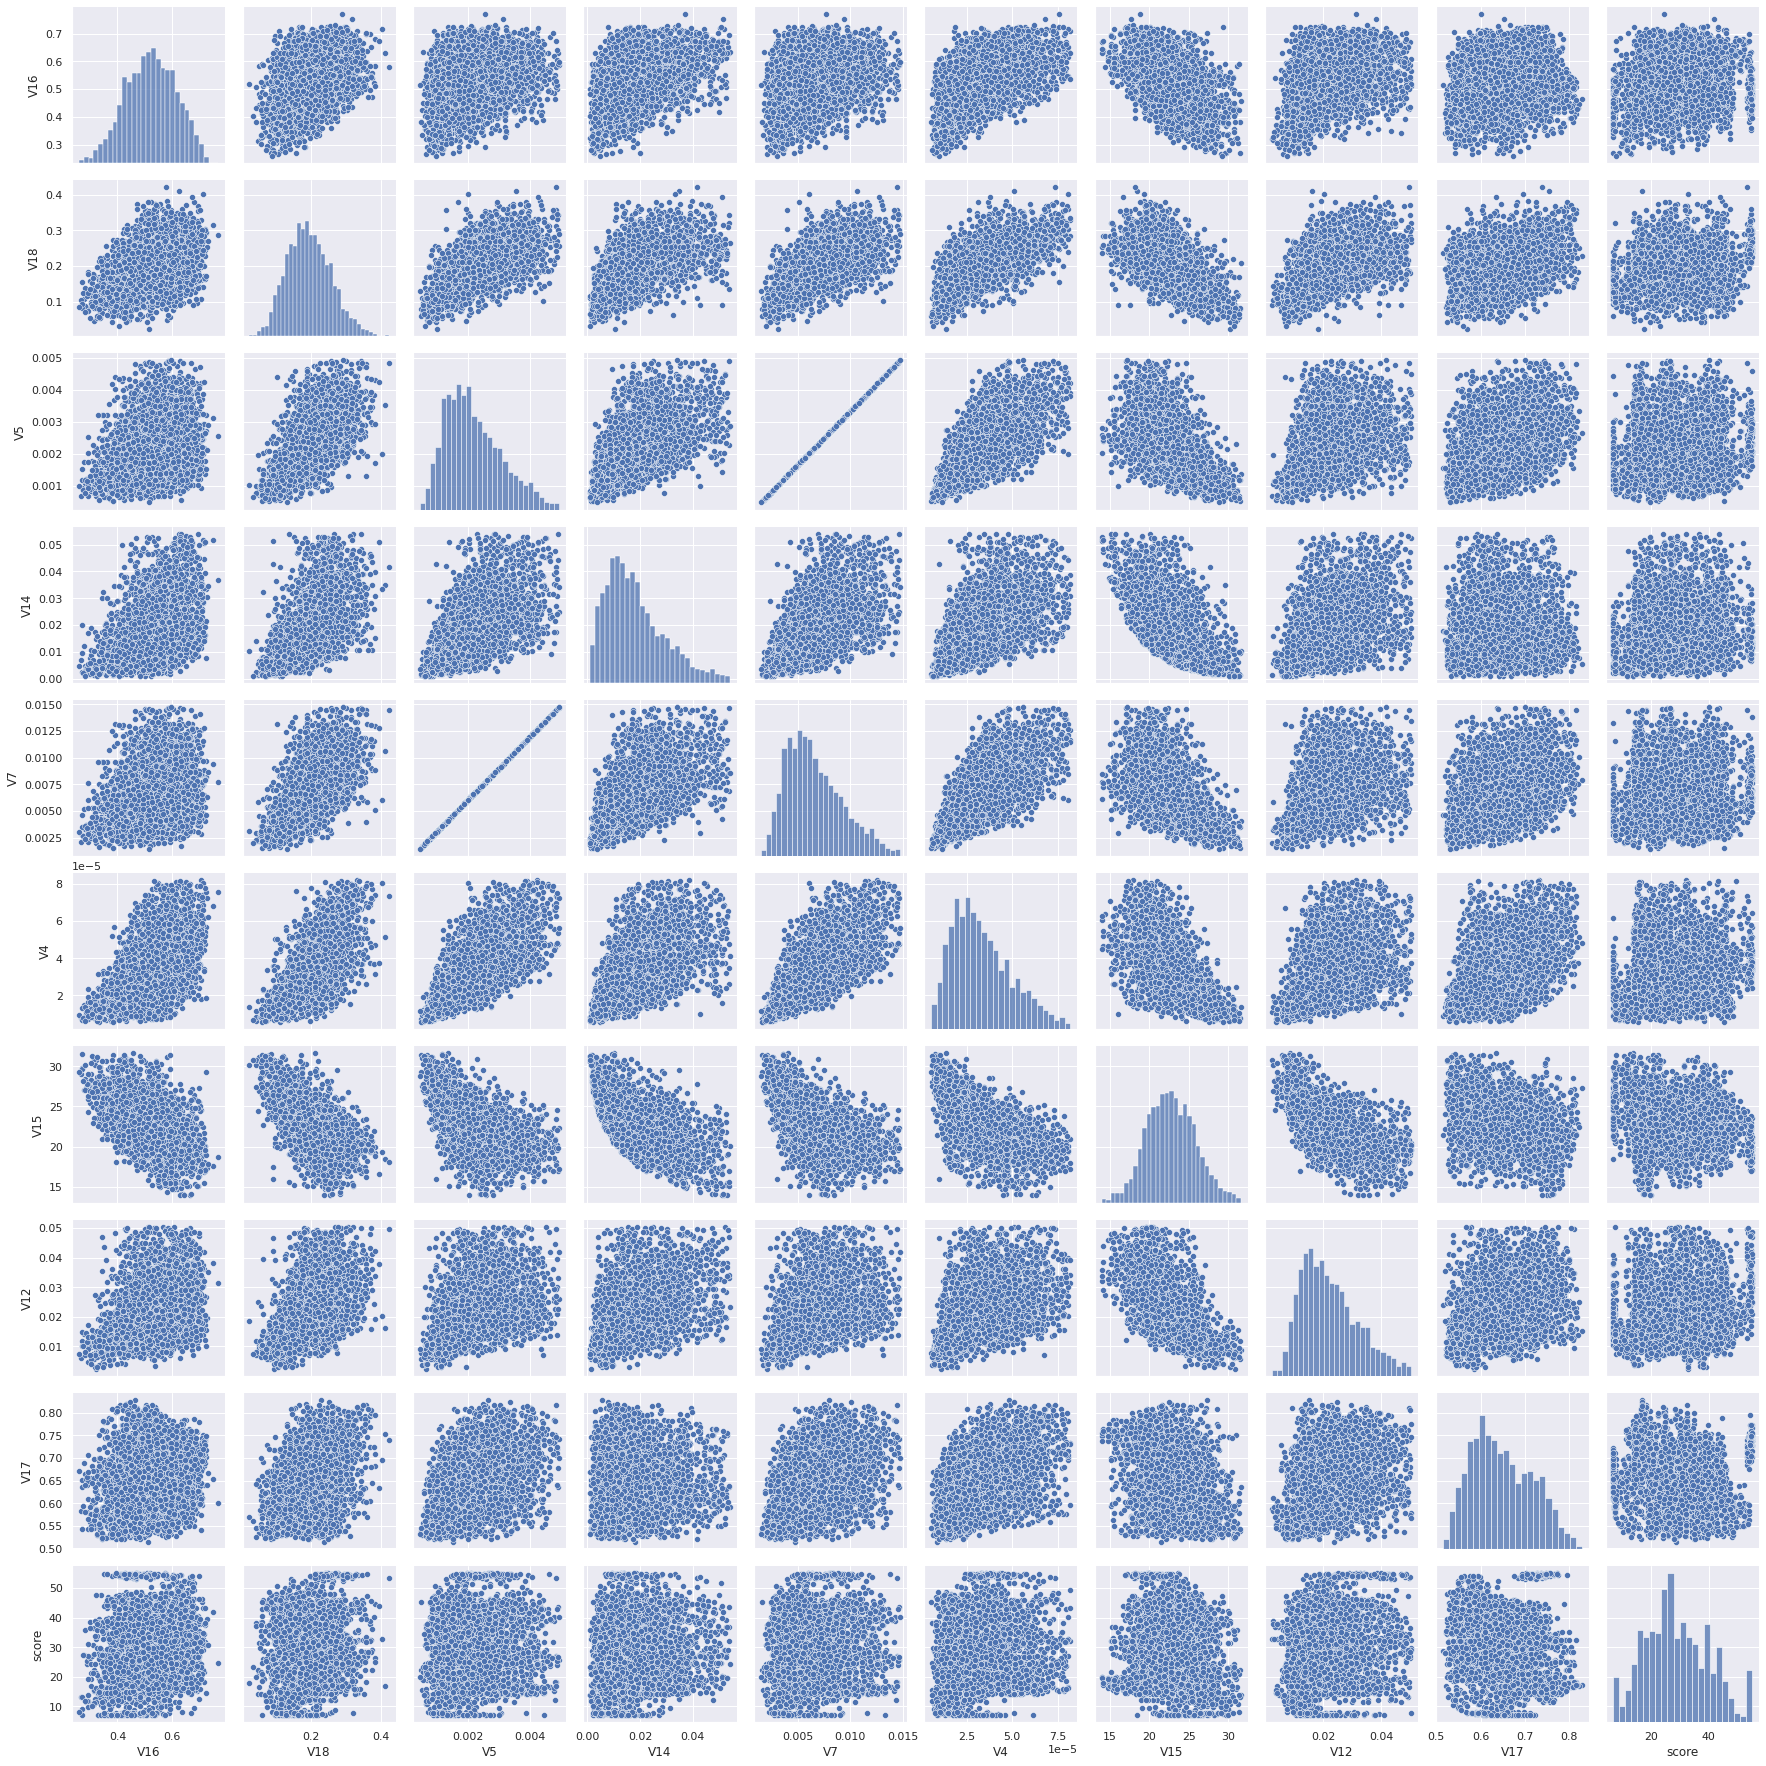

In [133]:
sns.pairplot(dados[(','.join(n_preditoras) + ',score').split(',')])
plt.show()

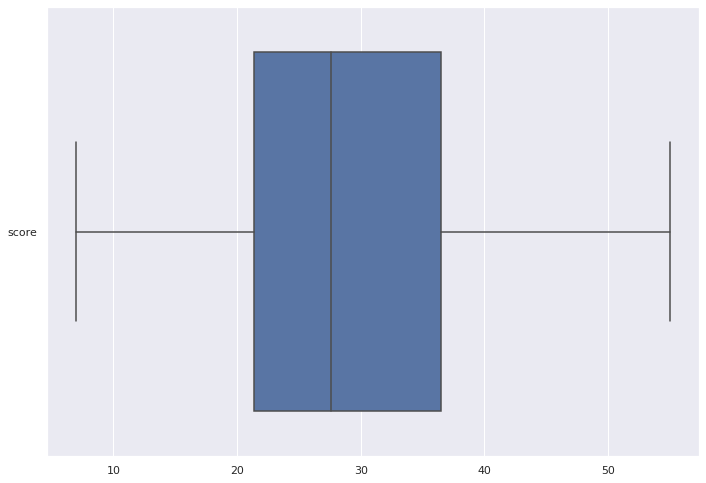

In [75]:
sns.boxplot(data=dfTrain[['score']], orient='h')


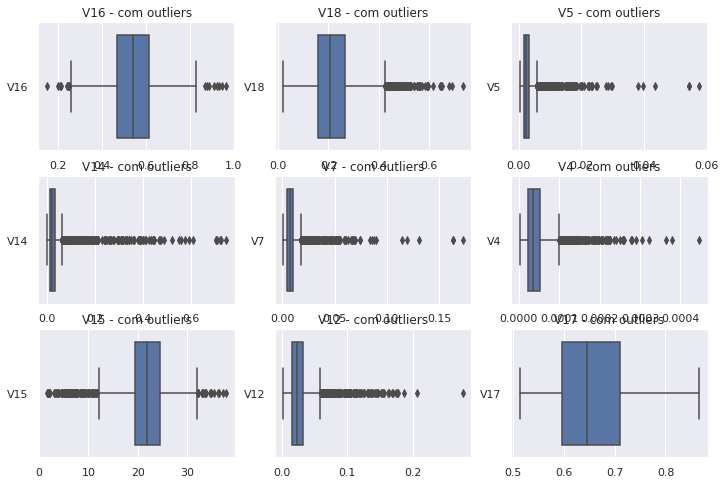

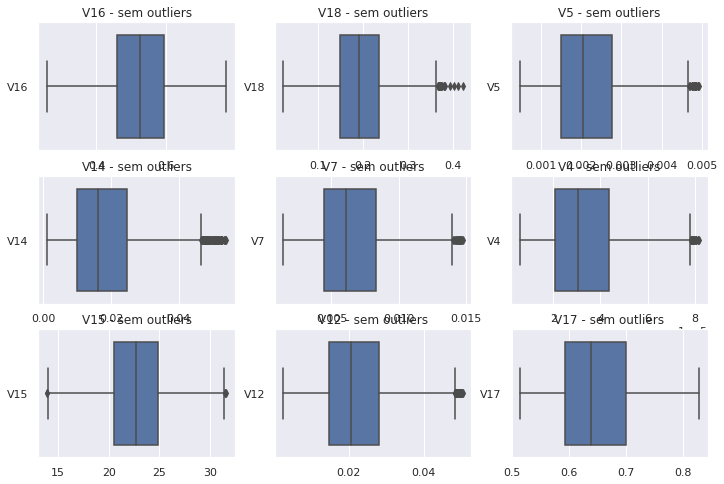

In [147]:
#box plot antes dos outliers
imprimeBoxPlot(dfTrain, n_preditoras, 'com outliers')
#box plot sem os outliers
imprimeBoxPlot(dados, n_preditoras, 'sem outliers')

In [135]:
n_preditoras

['V16', 'V18', 'V5', 'V14', 'V7', 'V4', 'V15', 'V12', 'V17']

(3392, 2)


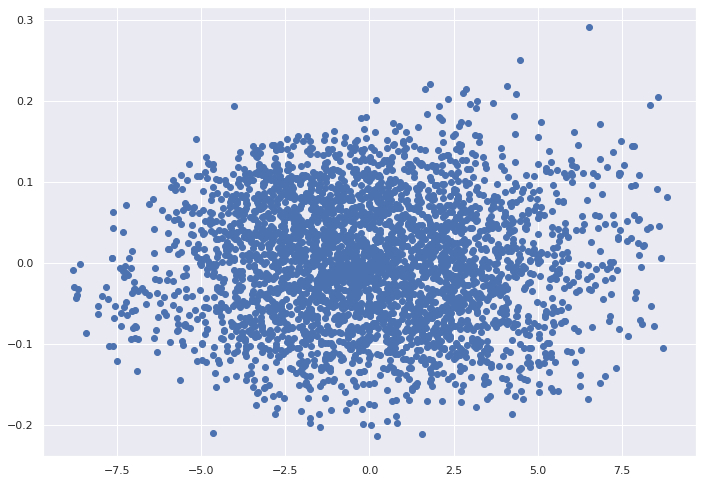

In [148]:
from sklearn.decomposition import PCA
###########
# projecting data in 2D
###########
X = dados[n_preditoras]
pca_proj=PCA(n_components=2)
data_2d=pca_proj.fit_transform(X)
print(data_2d.shape)

plt.scatter(data_2d[:,0],data_2d[:,1])


In [149]:
X = dados[n_preditoras]
y = dados['score']
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 123)

In [150]:
dados_t = pd.DataFrame(X_treino, columns=n_preditoras)
dados_t['score'] = y_treino

In [151]:
#Ajusta o modelo de regressão linear múltipla para o score

modelo = ols('score ~ ' + ' + '.join(n_preditoras) ,data=dados_t)

res = modelo.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     37.71
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           1.41e-63
Time:                        19:53:05   Log-Likelihood:                -10194.
No. Observations:                2713   AIC:                         2.041e+04
Df Residuals:                    2703   BIC:                         2.047e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.7415      4.790     13.307      0.0

In [ ]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
#scaled_features = StandardScaler().fit_transform(dados)
#scaled_features = MinMaxScaler().fit_transform(dados)
#dados = pd.DataFrame(scaled_features, columns=dados.columns)

In [152]:
modelo = ols('score ~ ' + ' + '.join(n_preditoras) ,data=dados)

res = modelo.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     46.01
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           1.14e-78
Time:                        19:53:12   Log-Likelihood:                -12758.
No. Observations:                3392   AIC:                         2.554e+04
Df Residuals:                    3382   BIC:                         2.560e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.3777      4.285     14.789      0.0